In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from time import time

In [29]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [264]:
import multiprocessing
import numpy as np

In [168]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel

In [4]:
from save_load import save_obj,load_obj

In [256]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [257]:
def generate_labels(title,xlabel,ylabel):    
    layout = go.Layout(title= title,
                       xaxis=dict(title=xlabel, automargin=True),
                       yaxis=dict(title=ylabel))
    return {'layout':layout}

In [5]:
doc = load_obj('mod_doc')

In [212]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=10, 
                                strip_accents = 'unicode',
                                max_features=5000,
                                stop_words='english', lowercase=True,
                                token_pattern=r'\b[a-zA-Z]{3,}\b')

In [213]:
t0 = time()
# tf = tf_vectorizer.fit_transform(mod_doc)
tf = tf_vectorizer.fit_transform(doc)
print("done in %0.3fs." % (time() - t0))
print()

done in 6.297s.



In [214]:
# transform sparse matrix into gensim corpus
corpus_vect_gensim = gensim.matutils.Sparse2Corpus(tf, documents_columns=False)

In [215]:
id2word = dict((ids, word) for word, ids in tf_vectorizer.vocabulary_.items())
dictionary = Dictionary.from_corpus(corpus_vect_gensim, id2word=id2word)

In [15]:
lda = LdaModel(corpus=corpus_vect_gensim, id2word=id2word, 
               alpha='auto', eta='auto', 
               iterations=400, num_topics=20,
               random_state=42, passes=10, chunksize=2000)

In [17]:
# save model
# save_obj(lda,'lda_gensim')

In [191]:
pprint(lda.top_topics(corpus_vect_gensim, topn=20))

[([(0.004996376, 'use'),
   (0.0043812077, 'know'),
   (0.0039463267, 'like'),
   (0.0038207273, 'good'),
   (0.0037684226, 'think'),
   (0.003239962, 'people'),
   (0.0030044587, 'time'),
   (0.002830531, 'work'),
   (0.0028015692, 'look'),
   (0.00264449, 'problem'),
   (0.0026069072, 'year'),
   (0.0025864595, 'need'),
   (0.002534153, 'new'),
   (0.0025273554, 'thank'),
   (0.0024898837, 'want'),
   (0.0023481, 'try'),
   (0.0023364709, 'drive'),
   (0.0022798863, 'thing'),
   (0.002243588, 'post'),
   (0.0022167976, 'file')],
  -1.6638698698373195),
 ([(0.022306636, 'team'),
   (0.019233752, 'game'),
   (0.0154621545, 'player'),
   (0.011192416, 'hockey'),
   (0.010962301, 'baseball'),
   (0.010815478, 'season'),
   (0.010026043, 'play'),
   (0.008797609, 'league'),
   (0.008259643, 'score'),
   (0.007740173, 'win'),
   (0.0073887277, 'nhl'),
   (0.0073702615, 'playoff'),
   (0.005818479, 'detroit'),
   (0.005800758, 'espn'),
   (0.005211515, 'pitcher'),
   (0.0050602313, 'braves'

In [27]:
pprint(lda.print_topics())

[(0,
  '0.021*"gun" + 0.019*"government" + 0.013*"law" + 0.010*"state" + '
  '0.008*"right" + 0.008*"crime" + 0.008*"weapon" + 0.008*"control" + '
  '0.008*"public" + 0.007*"people"'),
 (1,
  '0.047*"edu" + 0.036*"com" + 0.020*"mail" + 0.020*"post" + 0.017*"send" + '
  '0.017*"information" + 0.015*"list" + 0.014*"address" + 0.013*"email" + '
  '0.011*"request"'),
 (2,
  '0.011*"question" + 0.010*"use" + 0.009*"people" + 0.009*"mean" + '
  '0.008*"claim" + 0.008*"exist" + 0.008*"think" + 0.007*"example" + '
  '0.007*"argument" + 0.007*"law"'),
 (3,
  '0.016*"bike" + 0.014*"new" + 0.012*"nhl" + 0.012*"king" + 0.011*"chicago" + '
  '0.010*"dod" + 0.010*"detroit" + 0.010*"mike" + 0.009*"boston" + '
  '0.009*"good"'),
 (4,
  '0.024*"space" + 0.016*"image" + 0.011*"available" + 0.011*"program" + '
  '0.009*"nasa" + 0.009*"software" + 0.008*"include" + 0.008*"launch" + '
  '0.008*"datum" + 0.007*"ftp"'),
 (5,
  '0.015*"armenian" + 0.011*"president" + 0.010*"year" + 0.010*"april" + '
  '0.010*

## Note gensim starts indexing at 0 and pyLDAvis starts at 1

In [33]:
# Visualize the topics
visualize = pyLDAvis.gensim.prepare(lda, corpus_vect_gensim, dictionary,sort_topics=False)
visualize

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.066729 -0.180583       1        1   6.441814
1     -0.055353  0.033443       2        1   4.968007
2     -0.040527 -0.182390       3        1   9.530899
3      0.182941  0.171828       4        1   2.256670
4     -0.102565  0.028344       5        1   6.560561
5      0.162038 -0.087677       6        1   5.943226
6      0.106213  0.023929       7        1   3.904155
7      0.019574 -0.116546       8        1  18.067123
8      0.161298 -0.208789       9        1   2.979526
9      0.136141  0.160924      10        1   2.135787
10    -0.095815  0.034701      11        1   3.568173
11    -0.158805  0.088424      12        1   5.542151
12    -0.174870  0.108043      13        1   3.633693
13     0.278546  0.244603      14        1   1.132503
14    -0.126470 -0.017919      15        1   2.944277
15     0.077557 -0.196471      16        1   5.057064
16    -0.190088  0.049773      17        1   7.233135
17    -0.119633  0.051660      18        1   3.703020
18    -0.064279 -0.064369      19        1   2.721819
19    -0.062631  0.059073      20        1   1.676400, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
3791  Default  5847.000000          max  5847.000000  30.0000  30.0000
130   Default  6873.000000          use  6873.000000  29.0000  29.0000
116   Default  1670.000000          key  1670.000000  28.0000  28.0000
1198  Default  1871.000000          god  1871.000000  27.0000  27.0000
222   Default  2455.000000         file  2455.000000  26.0000  26.0000
175   Default  2465.000000          edu  2465.000000  25.0000  25.0000
1454  Default  1351.000000         game  1351.000000  24.0000  24.0000
280   Default  1069.000000          car  1069.000000  23.0000  23.0000
432   Default  1508.000000          com  1508.000000  22.0000  22.0000
126   Default  1657.000000        drive  1657.000000  21.0000  21.0000
168   Default  4184.000000         good  4184.000000  20.0000  20.0000
143   Default  2862.000000         year  2862.000000  19.0000  19.0000
46    Default  4194.000000       people  4194.000000  18.0000  18.0000
1348  Default  1007.000000         team  1007.000000  17.0000  17.0000
204   Default  1047.000000         card  1047.000000  16.0000  16.0000
412   Default  1307.000000        space  1307.000000  15.0000  15.0000
79    Default  4589.000000         know  4589.000000  14.0000  14.0000
1528  Default  1026.000000          gun  1026.000000  13.0000  13.0000
22    Default  3909.000000        think  3909.000000  12.0000  12.0000
34    Default  1300.000000   government  1300.000000  11.0000  11.0000
179   Default   907.000000        jesus   907.000000  10.0000  10.0000
653   Default  1489.000000          bit  1489.000000   9.0000   9.0000
1212  Default   918.000000         chip   918.000000   8.0000   8.0000
194   Default  2020.000000      program  2020.000000   7.0000   7.0000
172   Default  1211.000000         mail  1211.000000   6.0000   6.0000
163   Default  1668.000000         post  1668.000000   5.0000   5.0000
655   Default   978.000000         play   978.000000   4.0000   4.0000
68    Default  2657.000000          new  2657.000000   3.0000   3.0000
1525  Default  1272.000000          law  1272.000000   2.0000   2.0000
1894  Default   799.000000          win   799.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
1232  Topic20   252.346649      quality   320.518036   3.8494  -3.9151
1816  Topic20    84.176888        laser    97.488937   3.9417  -5.0130
3337  Topic20    43.726398          rpm    47.957676   3.9962  -5.6680
2665  Topic20    90.561501        plant   118.879509   3.8164  -4.9399
2872  Topic20    69.120316          sec    92.120285   3.8013  -5.2101
2461  Topic20    53.602768        thumb    67.666458   3.8555  -5.4643


In [42]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=10, 
                                strip_accents = 'unicode',
                                max_features=5000,
                                stop_words='english', lowercase=True,
                                token_pattern=r'\b[a-zA-Z]{3,}\b')

In [43]:
t0 = time()
# tf = tf_vectorizer.fit_transform(mod_doc)
tfidf = tfidf_vectorizer.fit_transform(doc)
print("done in %0.3fs." % (time() - t0))
print()

done in 2.368s.



In [44]:
corpus_vect_gensim_tfidf = gensim.matutils.Sparse2Corpus(tfidf, documents_columns=False)

In [45]:
id2word_tfidf = dict((ids, word) for word, ids in tfidf_vectorizer.vocabulary_.items())
dictionary_tfidf = Dictionary.from_corpus(corpus_vect_gensim_tfidf, id2word=id2word_tfidf)

In [300]:
lda_tfidf = LdaModel(corpus=corpus_vect_gensim_tfidf, id2word=id2word_tfidf, 
               alpha='auto', eta='auto', 
               iterations=400, num_topics=18,
               random_state=42, passes=10, chunksize=2000)

In [301]:
pprint(lda_tfidf.top_topics(corpus_vect_gensim_tfidf, topn=20))

[([(0.007909186, 'use'),
   (0.0071694516, 'know'),
   (0.0064596306, 'like'),
   (0.0062545952, 'good'),
   (0.006168515, 'think'),
   (0.0053032534, 'people'),
   (0.004917028, 'time'),
   (0.0045819595, 'look'),
   (0.004580313, 'work'),
   (0.0043169414, 'year'),
   (0.0042424477, 'problem'),
   (0.004180046, 'need'),
   (0.0041454756, 'new'),
   (0.0040740194, 'want'),
   (0.0039040407, 'thank'),
   (0.0038381245, 'try'),
   (0.0037300487, 'thing'),
   (0.003670621, 'post'),
   (0.0035745597, 'right'),
   (0.003568553, 'edu')],
  -1.5883504856417612),
 ([(0.026546646, 'file'),
   (0.022727838, 'card'),
   (0.021226121, 'window'),
   (0.018371144, 'program'),
   (0.017773785, 'windows'),
   (0.01600603, 'disk'),
   (0.0147050135, 'software'),
   (0.014137624, 'driver'),
   (0.013187736, 'monitor'),
   (0.012476134, 'dos'),
   (0.012303954, 'mac'),
   (0.012261281, 'info'),
   (0.011828325, 'video'),
   (0.011490467, 'thanks'),
   (0.010778815, 'color'),
   (0.010062647, 'ftp'),
   

In [303]:
## Visualize the topics
visualize_tfidf = pyLDAvis.gensim.prepare(lda_tfidf, corpus_vect_gensim_tfidf, dictionary_tfidf,sort_topics=False)
visualize_tfidf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.059443 -0.001874       1        1   0.220451
1      0.099516 -0.171238       2        1   6.304578
2      0.263712  0.285867       3        1   6.606356
3     -0.061377 -0.003887       4        1   0.295682
4     -0.055348 -0.014278       5        1   1.394508
5      0.089255 -0.150345       6        1   5.350378
6      0.114803 -0.031891       7        1   5.282082
7      0.065172 -0.106829       8        1   4.446473
8     -0.064399 -0.004173       9        1   0.317895
9     -0.066476 -0.004115      10        1   0.367388
10     0.244067  0.018888      11        1   7.217041
11    -0.062711 -0.016322      12        1   0.969460
12    -0.179929  0.249116      13        1  58.168747
13    -0.065160 -0.014878      14        1   0.815490
14    -0.065194 -0.006039      15        1   0.456626
15    -0.066903 -0.013621      16        1   0.741316
16    -0.065429 -0.005498      17        1   0.439662
17    -0.064157 -0.008882      18        1   0.605871, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
1198  Default   96.000000          god   96.000000  30.0000  30.0000
222   Default   99.000000         file   99.000000  29.0000  29.0000
116   Default   75.000000          key   75.000000  28.0000  28.0000
204   Default   79.000000         card   79.000000  27.0000  27.0000
651   Default   76.000000       window   76.000000  26.0000  26.0000
126   Default  114.000000        drive  114.000000  25.0000  25.0000
194   Default   80.000000      program   80.000000  24.0000  24.0000
1038  Default   62.000000      windows   62.000000  23.0000  23.0000
1538  Default   61.000000       driver   61.000000  22.0000  22.0000
1012  Default   56.000000         disk   56.000000  21.0000  21.0000
179   Default   46.000000        jesus   46.000000  20.0000  20.0000
1305  Default   53.000000       player   53.000000  19.0000  19.0000
368   Default   54.000000     software   54.000000  18.0000  18.0000
333   Default   29.000000         soon   29.000000  17.0000  17.0000
1454  Default  101.000000         game  101.000000  16.0000  16.0000
175   Default  110.000000          edu  110.000000  15.0000  15.0000
430   Default   46.000000      monitor   46.000000  14.0000  14.0000
34    Default   63.000000   government   63.000000  13.0000  13.0000
2120  Default   38.000000    christian   38.000000  12.0000  12.0000
88    Default   40.000000       israel   40.000000  11.0000  11.0000
506   Default   44.000000          dos   44.000000  10.0000  10.0000
494   Default   43.000000          mac   43.000000   9.0000   9.0000
418   Default   47.000000         info   47.000000   8.0000   8.0000
660   Default   44.000000        color   44.000000   7.0000   7.0000
778   Default   42.000000        video   42.000000   6.0000   6.0000
852   Default   34.000000        modem   34.000000   5.0000   5.0000
1345  Default   35.000000     religion   35.000000   4.0000   4.0000
1348  Default   68.000000         team   68.000000   3.0000   3.0000
2449  Default   43.000000       thanks   43.000000   2.0000   2.0000
1261  Default   33.000000        bible   33.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
1175  Topic18    8.330256       gordon    8.994401   5.0296  -3.6483
1176  Topic18    7.202119        banks    7.866263   5.0181  -3.7939
1179  Topic18    6.983931    intellect    7.648075   5.0154  -3.8246
1177  Topic18    6.964982   skepticism    7.629127   5.0152  -3.8273
1180  Topic18    6.912664          geb    7.576808   5.0145  -3.8349
1183  Topic18    6.849247     shameful    7.513391   5.0137  -3.8441
1181  Topic18    6.828232        cadre    7.492376   5.0134  -3.8472
1178  Topic18    6.788103     chastity    7.452247   5.0129  -3.8531
1182  Topic18    6.774295          dsl    7.4384

## Word2Vec Model

In [63]:
# Get number of CPU core
cores = multiprocessing.cpu_count() 
cores

8

In [240]:
doc_list = load_obj('doc_list')

In [153]:
t = time()
word2vec = gensim.models.Word2Vec(doc_list,min_count=10, window=5,
                                  size=5000, workers=cores-1)

print('Building Time : {:.2f} mins'.format((time() - t) / 60))

Building Time : 0.87 mins


In [154]:
# save_obj(word2vec,'word2vec_5000')

In [148]:
w2v = load_obj('word2vec_5000')

In [144]:
w2v.wv.most_similar(positive=["god"])

[('jesus', 0.9357113838195801),
 ('word', 0.912039577960968),
 ('christ', 0.892924964427948),
 ('sin', 0.8912561535835266),
 ('spirit', 0.8883153200149536),
 ('heaven', 0.8818057775497437),
 ('faith', 0.878771960735321),
 ('grace', 0.8769556879997253),
 ('gospel', 0.8766798973083496),
 ('bless', 0.8746601939201355)]

In [149]:
w2v.wv.most_similar(positive=["god"])

[('jesus', 0.9316027760505676),
 ('word', 0.9078030586242676),
 ('christ', 0.8902674913406372),
 ('spirit', 0.8879156112670898),
 ('heaven', 0.8865305185317993),
 ('salvation', 0.8860034346580505),
 ('bless', 0.8842337131500244),
 ('sin', 0.8808265924453735),
 ('scripture', 0.8805694580078125),
 ('eternal', 0.879788875579834)]

In [150]:
w2v.wv.most_similar(positive=["jesus"])

[('christ', 0.9759734272956848),
 ('matthew', 0.9703889489173889),
 ('heaven', 0.9621171951293945),
 ('bless', 0.9572410583496094),
 ('spirit', 0.9562658071517944),
 ('lord', 0.9528225660324097),
 ('gospel', 0.951744556427002),
 ('father', 0.9466325044631958),
 ('passage', 0.9453181624412537),
 ('eternal', 0.9439318180084229)]

In [136]:
w2v.wv.similarity('god','jesus')

0.93900305

## Optimize topic numbers by caculating coherence

In [282]:
ls data/

a.pkl               lda_gensim.pkl      obj.pkl             word2vec_2000.pkl
coherence_vals.pkl  mod_doc.pkl         word2vec.pkl        word2vec_5000.pkl
doc_list.pkl        models.pkl          word2vec_1000.pkl


In [324]:
doc_list = load_obj('doc_list')

In [326]:
print(doc_list[0],end= " ")

['sure', 'story', 'nad', 'biased', 'disagree', 'statement', 'media', 'ruin', 'israels', 'reputation', 'rediculous', 'media', 'proisraeli', 'medium', 'world', 'live', 'europe', 'realize', 'incidence', 'describe', 'letter', 'occur', 'medium', 'try', 'ignore', 'subsidize', 'israels', 'existance', 'europeans', 'degree', 'think', 'reason', 'report', 'clearly', 'atrocity', 'shame', 'austria', 'daily', 'report', 'inhuman', 'act', 'commit', 'israeli', 'soldier', 'blessing', 'receive', 'government', 'holocaust', 'guilt', 'away', 'look', 'jews', 'treat', 'race', 'power', 'unfortunate'] 

In [327]:
id2word = Dictionary(doc_list)

In [328]:
len(id2word)

92353

In [329]:
id2word.filter_extremes(no_below=10, no_above=0.95)

In [330]:
len(id2word)

7178

In [331]:
t = time()
corpus = [id2word.doc2bow(text) for text in doc_list]
print('Building Time : {:.2f} mins'.format((time() - t) / 60))

Building Time : 0.02 mins


In [332]:
pprint(id2word[2])

'austria'


In [333]:
print(corpus[:1],end=" ")

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)]] 

In [380]:
t=time()
lda = LdaModel(corpus=corpus, id2word=id2word, 
                       alpha='auto', eta='auto',
                       iterations=400, num_topics=20, per_word_topics=True,
                       random_state=42, passes=10, chunksize=2000)
print('Building Time : {:.2f} mins'.format((time() - t) / 60))

Building Time : 1.07 mins


In [381]:
## Visualize the topics
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word,sort_topics=False)
vis

/Users/thein/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.055920 -0.134499       1        1   1.761968
1     -0.171764  0.006314       2        1   5.818799
2     -0.079708  0.028046       3        1   3.871304
3     -0.238682  0.014686       4        1   6.844163
4     -0.134358 -0.013995       5        1   3.452317
5     -0.180412 -0.053975       6        1   3.853661
6     -0.112122  0.029887       7        1   3.315567
7      0.165636 -0.033385       8        1   7.076917
8      0.100220 -0.115166       9        1   6.679329
9      0.128774 -0.173383      10        1   7.382965
10     0.135862  0.195943      11        1   3.415923
11     0.104237 -0.018835      12        1   4.544759
12     0.074842  0.079981      13        1   1.323903
13     0.158810  0.370123      14        1   2.251815
14     0.050256  0.027876      15        1   6.618956
15     0.167838 -0.163234      16        1   2.646577
16    -0.013036  0.010563      17        1   7.072723
17     0.078752 -0.131597      18        1  14.718525
18    -0.095186  0.071258      19        1   3.228398
19    -0.195880  0.003393      20        1   4.121433, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
208   Default  2660.000000         file  2660.000000  30.0000  30.0000
158   Default  6940.000000          use  6940.000000  29.0000  29.0000
1223  Default  1850.000000          god  1850.000000  28.0000  28.0000
133   Default  1432.000000          key  1432.000000  27.0000  27.0000
2073  Default  1326.000000         game  1326.000000  26.0000  26.0000
166   Default  4203.000000         good  4203.000000  25.0000  25.0000
126   Default  1596.000000        drive  1596.000000  24.0000  24.0000
278   Default  1071.000000          car  1071.000000  23.0000  23.0000
1437  Default  1005.000000         team  1005.000000  22.0000  22.0000
175   Default  1608.000000         post  1608.000000  21.0000  21.0000
1173  Default  1095.000000       window  1095.000000  20.0000  20.0000
95    Default  4621.000000         know  4621.000000  19.0000  19.0000
72    Default  4194.000000       people  4194.000000  18.0000  18.0000
550   Default   883.000000        entry   883.000000  17.0000  17.0000
300   Default  1299.000000        thank  1299.000000  16.0000  16.0000
161   Default  2771.000000         year  2771.000000  15.0000  15.0000
869   Default   967.000000         play   967.000000  14.0000  14.0000
96    Default  4040.000000         like  4040.000000  13.0000  13.0000
42    Default  3971.000000        think  3971.000000  12.0000  12.0000
543   Default  1193.000000        email  1193.000000  11.0000  11.0000
200   Default   967.000000         card   967.000000  10.0000  10.0000
221   Default  2112.000000      program  2112.000000   9.0000   9.0000
1243  Default   868.000000         chip   868.000000   8.0000   8.0000
1281  Default  1623.000000      believe  1623.000000   7.0000   7.0000
1567  Default   911.000000          gun   911.000000   6.0000   6.0000
984   Default  1308.000000         send  1308.000000   5.0000   5.0000
518   Default   866.000000         disk   866.000000   4.0000   4.0000
142   Default   734.000000        price   734.000000   3.0000   3.0000
1073  Default  2356.000000       system  2356.000000   2.0000   2.0000
383   Default  1460.000000          bit  1460.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
978   Topic20   324.707458       screen   411.848724   2.9512  -4.5639
290   Topic20   399.192749       memory   549.283691   2.8698  -4.3574
738   Topic20   391.834442          mac   552.043640   2.8462  -4.3760
2340  Topic20   150.353455         slot   182.400955   2.9958  -5.3339
2906  Topic20   108.276421      adapter   130.304565   3.0038  -5.6622
434   Topic20   391.654205        color   633.665222   2.7078  -4.3765


In [382]:
cm = CoherenceModel(model=lda, texts=doc_list, 
                            dictionary=id2word, coherence='c_v')

In [383]:
cm.get_coherence()

0.5858109980552558

In [384]:
def get_coherence(corpus, id2word, doc_list, start, end, step):
    model_list = []
    coherence_vals =[]
    for topic_num in range(start, end, step):
        print('topic_num',topic_num)
        t=time()
        lda = LdaModel(corpus=corpus, id2word=id2word, 
                       alpha='auto', eta='auto',
                       iterations=400, num_topics=topic_num, per_word_topics=True,
                       random_state=42, passes=10, chunksize=2000)
        
        model_list.append(lda)

        cm = CoherenceModel(model=lda, texts=doc_list, 
                            dictionary=id2word, coherence='c_v')

        coherence_vals.append(cm.get_coherence())  # get coherence value
        
        print('Building Time : {:.2f} mins'.format((time() - t) / 60))
    
    return model_list, coherence_vals

In [ ]:
t=time()
models, coherence_vals = get_coherence(corpus, id2word, 
                                       doc_list, 5, 40, 3)
print('\n=============\nTotal Building Time : {:.2f} mins'.format((time() - t) / 60))

topic_num 5
Building Time : 1.23 mins
topic_num 8


In [370]:
coherence_vals

[0.5541990240629209,
 0.5266858571118087,
 0.4930051202829721,
 0.4621104999749804,
 0.47382464445665784,
 0.47510100596587523,
 0.4395858559626874,
 0.4443028271186615,
 0.44301680638558066,
 0.43730701227393143,
 0.40419907567813795,
 0.43022862705942666]

In [372]:
save_obj(models,'models_step3_tfidf')

In [373]:
save_obj(coherence_vals,'coherence_vals_step3_tfidf')

In [371]:
print(models[1].top_topics(corpus, topn=20),end=" ")

[([(0.020499242, 'people'), (0.019247983, 'know'), (0.018523088, 'think'), (0.01734834, 'god'), (0.015049019, 'believe'), (0.011446152, 'come'), (0.010787494, 'word'), (0.010131434, 'thing'), (0.00933736, 'tell'), (0.008994702, 'jesus'), (0.008802674, 'life'), (0.008627275, 'man'), (0.008416821, 'world'), (0.0083305705, 'way'), (0.0078577055, 'mean'), (0.0078192875, 'find'), (0.0076737176, 'time'), (0.0073923473, 'child'), (0.007040316, 'reason'), (0.0068181246, 'want')], -1.5825298975477065), ([(0.025527036, 'use'), (0.01554363, 'like'), (0.014685026, 'work'), (0.013921749, 'know'), (0.013028335, 'problem'), (0.011414226, 'need'), (0.010115271, 'good'), (0.008721495, 'system'), (0.008506214, 'look'), (0.008333627, 'want'), (0.008102633, 'drive'), (0.0077899043, 'try'), (0.007378825, 'new'), (0.0073414324, 'time'), (0.0068753664, 'thank'), (0.0059219953, 'help'), (0.005632913, 'find'), (0.0055835303, 'car'), (0.005188932, 'way'), (0.005183309, 'card')], -1.7504155966721417), ([(0.01462

In [267]:
trace = go.Scatter(x=np.arange(5,40,3), 
                   y=coherence_vals,mode = 'lines+markers')
iplot([trace])

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline

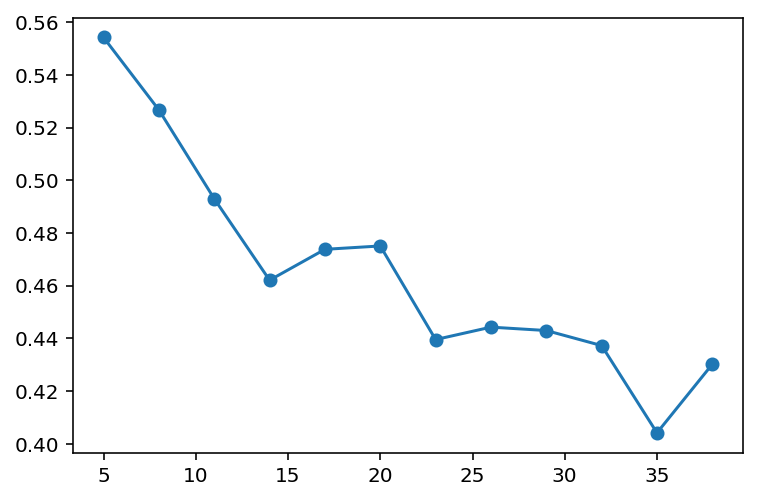

In [374]:
plt.plot(np.arange(5,40,3),coherence_vals,'o-')

In [342]:
coherence_vals

[0.5617503709808187,
 0.544815865917843,
 0.5960281964855008,
 0.5901569514018996,
 0.564963381470279,
 0.5858109980552558,
 0.5693338467460198,
 0.6102794131748608,
 0.5764223525428733,
 0.6089718830094341,
 0.5758294010255471,
 0.5832841996261747]

In [356]:
coherence_vals

[0.43461655266668864]

In [375]:
## Visualize the topics
visualize_topic25 = pyLDAvis.gensim.prepare(models[0], corpus, id2word,sort_topics=False)
visualize_topic25

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.144884  0.330280       1        1  19.677841
1      0.051576  0.022907       2        1  38.917068
2     -0.297962 -0.246123       3        1   9.228674
3      0.273371 -0.090317       4        1  14.980491
4      0.117899 -0.016748       5        1  17.195930, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
208   Default  2783.000000         file  2783.000000  30.0000  30.0000
158   Default  7196.000000          use  7196.000000  29.0000  29.0000
72    Default  4141.000000       people  4141.000000  28.0000  28.0000
2073  Default  1473.000000         game  1473.000000  27.0000  27.0000
166   Default  4220.000000         good  4220.000000  26.0000  26.0000
95    Default  4558.000000         know  4558.000000  25.0000  25.0000
96    Default  4053.000000         like  4053.000000  24.0000  24.0000
221   Default  2407.000000      program  2407.000000  23.0000  23.0000
161   Default  2958.000000         year  2958.000000  22.0000  22.0000
1223  Default  1727.000000          god  1727.000000  21.0000  21.0000
133   Default  1411.000000          key  1411.000000  20.0000  20.0000
1437  Default  1023.000000         team  1023.000000  19.0000  19.0000
869   Default   957.000000         play   957.000000  18.0000  18.0000
550   Default  1246.000000        entry  1246.000000  17.0000  17.0000
1073  Default  2254.000000       system  2254.000000  16.0000  16.0000
543   Default  1108.000000        email  1108.000000  15.0000  15.0000
1173  Default  1093.000000       window  1093.000000  14.0000  14.0000
1017  Default  1020.000000     software  1020.000000  13.0000  13.0000
76    Default  1918.000000          run  1918.000000  12.0000  12.0000
1281  Default  1596.000000      believe  1596.000000  11.0000  11.0000
1151  Default  1012.000000      version  1012.000000  10.0000  10.0000
365   Default  1407.000000    available  1407.000000   9.0000   9.0000
109   Default  2447.000000         want  2447.000000   8.0000   8.0000
1941  Default   808.000000          win   808.000000   7.0000   7.0000
518   Default   876.000000         disk   876.000000   6.0000   6.0000
1025  Default   992.000000        space   992.000000   5.0000   5.0000
666   Default  1448.000000  information  1448.000000   4.0000   4.0000
42    Default  3850.000000        think  3850.000000   3.0000   3.0000
200   Default   850.000000         card   850.000000   2.0000   2.0000
220   Default  2355.000000      problem  2355.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
3036   Topic5   318.006226      society   318.838257   1.7579  -6.0133
1255   Topic5   307.777893      private   308.590790   1.7579  -6.0460
319    Topic5   305.598083       agency   306.411987   1.7578  -6.0531
387    Topic5   303.917450        block   304.735596   1.7578  -6.0586
326    Topic5   296.182220    algorithm   296.991516   1.7578  -6.0844
145    Topic5   533.875977      product   535.910339   1.7567  -5.4952
1025   Topic5   975.875305        space   992.375366   1.7437  -4.8920
498    Topic5   480.473846       design   507.601715   1.7056  -5.6006
991    Topic5   502.503906      service   536.404358   1.6952  -5.5557
1425   Topic5   520.272644     national   584.614014   1.6439  -5.5210
906    Topic5   708.336731       public   875.195312   1.5490  -5.2124
140    Topic5   489.815857        phone   567.232605   1.6138  -5.5813
3286   Topic5   547.980774       health   663.912109   1.5686  -5.4691
974    Topic5   432.067963      science   487.265350   1.6403  -5.7068
904    Topic5   667.219360      provide   981.546631   1.3745  -5.2722
1073   Topic5  1119.325562       system  2254.647461   1.0602  -4.7549
33     Topic5   610.561096       report   861.108215   1.4167  -5.3610
217    Topic5   867.299072   

In [297]:
pprint(models[6].top_topics(corpus_vect_gensim, topn=20))

[([(0.021045964, 'battery'),
   (0.012368661, 'symbol'),
   (0.01162549, 'easter'),
   (0.010596918, 'cure'),
   (0.009321653, 'phillies'),
   (0.008181788, 'mvp'),
   (0.007872469, 'goaltender'),
   (0.007038944, 'astros'),
   (0.0059389966, 'gps'),
   (0.004952169, 'bounce'),
   (0.004797032, 'dip'),
   (0.0047717444, 'cabinet'),
   (0.0045838957, 'unclear'),
   (0.0044334107, 'binding'),
   (0.0039145467, 'motorola'),
   (0.0038638453, 'selective'),
   (0.0037920782, 'czech'),
   (0.0037477128, 'rychel'),
   (0.0036663883, 'parish'),
   (0.0034341908, 'standpoint')],
  -2.129295721357944),
 ([(0.017231876, 'norton'),
   (0.012210464, 'abc'),
   (0.0091858795, 'gnd'),
   (0.008296107, 'kidney'),
   (0.006761012, 'intentional'),
   (0.0058394084, 'cub'),
   (0.005602519, 'marijuana'),
   (0.0053569092, 'utilities'),
   (0.0051829186, 'matthews'),
   (0.0051742815, 'stone'),
   (0.005020897, 'suck'),
   (0.0044984547, 'vent'),
   (0.0036305669, 'tiger'),
   (0.0036030638, 'guns'),
   (

In [296]:
## Visualize the topics
visualize_topic5 = pyLDAvis.gensim.prepare(models[0], corpus, id2word,sort_topics=False)
visualize_topic5

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.175592  0.001987       1        1  28.867308
1      0.347045 -0.126684       2        1  10.614066
2     -0.166812  0.034631       3        1  27.228275
3     -0.132435 -0.148257       4        1  29.672247
4      0.127795  0.238323       5        1   3.618107, topic_info=      Category         Freq                             Term        Total  \
term                                                                        
4220   Default  5194.000000                                q  5194.000000   
371    Default  4256.000000                                m  4256.000000   
2459   Default  9195.000000                                x  9195.000000   
297    Default  3253.000000                                f  3253.000000   
465    Default  2847.000000                                t  2847.000000   
471    Default  2599.000000                                u  2599.000000   
40072  Default  2558.000000  maxaxaxaxaxaxaxaxaxaxaxaxaxaxax  2558.000000   
272    Default  2817.000000                                d  2817.000000   
2418   Default  2177.000000                                w  2177.000000   
6411   Default  1426.000000                               fb  1426.000000   
280    Default  1662.000000                                e  1662.000000   
395    Default  1770.000000                                p  1770.000000   
302    Default  2542.000000                             file  2542.000000   
25892  Default  1221.000000                               vg  1221.000000   
359    Default  1295.000000                                l  1295.000000   
15     Default  1112.000000                       government  1112.000000   
2995   Default   999.000000                              law   999.000000   
476    Default  1399.000000                                v  1399.000000   
312    Default  1204.000000                                g  1204.000000   
2531   Default  1768.000000                              god  1768.000000   
132    Default  1492.000000                                b  1492.000000   
183    Default  6523.000000                              use  6523.000000   
2983   Default   645.000000                              gun   645.000000   
256    Default  1804.000000                                c  1804.000000   
452    Default  4417.000000                                s  4417.000000   
429    Default  1679.000000                                r  1679.000000   
497    Default   805.000000                                z   805.000000   
204    Default  2012.000000                            right  2012.000000   
348    Default  1189.000000                                k  1189.000000   
410    Default  2018.000000                          program  2018.000000   
...        ...          ...                              ...          ...   
5390    Topic5   102.400703                     constitution   127.229866   
2966    Topic5   198.509308                         criminal   272.321594   
2965    Topic5   194.916702                            crime   309.481201   
3996    Topic5   196.836349                           weapon   315.319885   
3852    Topic5    62.405529                              cop    79.009552   
2917    Topic5    43.179276                        baltimore    50.635948   
2964    Topic5   166.083115                            court   284.985382   
2708    Topic5    85.708725                              ban   122.500931   
4410    Topic5   136.272415                          federal   231.553497   
2778    Topic5    76.678291                               gm   111.346245   
2995    Topic5   362.967499                              law   999.947754   
6120    Topic5    50.581329                         attorney    65.216866   
7071    Topic5    69.234390                               op   102.339943   
3969    Topic5    52.996529          